In [1]:
import random
import time
from typing import List
import matplotlib.pyplot as plt
import pandas as pd

## Utilities

In [2]:
%matplotlib inline

In [3]:
def generate_random_array(size: int) -> List[int]:
    return [random.randint(1, 5000) for _ in range(size)]


In [4]:

def save_to_json(res: List[dict], filename: str) -> None:
    import json
    with open(filename, "w") as f:
        json.dump(res, f)

In [5]:


def save_to_csv(res: List[dict], filename: str) -> None:
    df = pd.DataFrame(res)
    df.to_csv(filename, index=False)



In [6]:

def save_results(res: List[dict], filename: str, file_format: str = "csv") -> None:
    if file_format == "json":
        save_to_json(res, filename)
    elif file_format == "csv":
        save_to_csv(res, filename)
    else:
        raise ValueError("Invalid file format. Please choose either 'json' or 'csv'.")



In [18]:

def graph_results(res: List[dict], title: str, x_label: str = "n", y_label: str = "time") -> None:
    x = [r["n"] for r in res]
    y = [r["time"] for r in res]

    print(x)
    print(y)

    plt.plot(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    # plt.savefig(title + ".png")
    # plt.plot()

    plt.show()

    # # clean up
    # plt.clf()
    # plt.cla()

In [8]:


def median(arr: List[float]) -> float:
    n = len(arr)
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        return (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2
    else:
        return sorted_arr[n // 2]



In [9]:

def run_experiment(n: int, num_experiments: int, algorithm) -> float:
    times = []
    for _ in range(num_experiments):
        arr = generate_random_array(n)
        start_time = time.time()
        algorithm(arr)

        """ if (algorithm.__name__ == "merge_sort"):
            algorithm(arr, 0, len(arr) - 1)
        else:
            algorithm(arr) """

        end_time = time.time()
        times.append(end_time - start_time)
    return median(times)


In [10]:


def run_test(algorithm, time = 300) -> List[dict]:
    n = 1
    total_time = 0
    num_experiments = 100
    res = []
    while total_time < time:
        median_time = run_experiment(n, num_experiments, algorithm=algorithm)
        # print(f"For n={n}, median execution time: {median_time:.6f} seconds")
        res.append({"n": n, "time": median_time})
        total_time += median_time * num_experiments
        n += 1

    return res



In [11]:

#inputs should be something like: {"merge_sort": merge_sort_results, "insertion_sort": insertion_sort_results, ...}
#outputs a graph comparing the results of all the algorithms
#lines should be different colors, make sure to include a legend with the names of the algorithms
def graph_results_merged(filePaths: List[str]) -> None:
    #load the results from the files

    names = [file.split("_")[0] for file in filePaths]

    dfs = []
    for file in filePaths:
        dfs.append(pd.read_csv(file))

    #plot the results
    for df in dfs:
        plt.plot(df["n"], df["time"])
    plt.xlabel("n")
    plt.ylabel("time")
    plt.title("All Results")
    # plt.legend([df.columns[1] for df in dfs])
    plt.legend(names)
    plt.savefig("All Results.png")
    plt.plot()

    #clean up

    # plt.clf()
    # plt.cla()


## Insertion Sort

In [12]:
def insertion_sort(arr: List[int]) -> None:
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


def insertion_sort_with_range(arr: List[int], p: int, r: int) -> None:
    for i in range(p + 1, r + 1):
        key = arr[i]
        j = i - 1
        while j >= p and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key



## Merge sort

In [13]:
def merge(a: List[int], p:int, q:int, r:int) -> List[int]:
    nl = q - p + 1
    nr = r - q

    L = [0] * nl
    R = [0] * nr

    for i in range(nl):
        L[i] = a[p+i]

    for j in range(nr):
        R[j] = a[q+j+1]

    i = 0
    j = 0
    k = p

    while i < nl and j < nr:
        if L[i] <= R[j]:
            a[k] = L[i]
            i += 1
        else:
            a[k] = R[j]
            j += 1
        k += 1

    while i < nl:
        a[k] = L[i]
        i += 1
        k += 1

    while j < nr:
        a[k] = R[j]
        j += 1
        k += 1

    return a

def _merge_sort(a: List[int], p:int, r:int) -> List[int]:
    if p < r:
        q = (p + r) // 2
        _merge_sort(a, p, q)
        _merge_sort(a, q+1, r)
        merge(a, p, q, r)
    return a

def merge_sort(a: List[int]):
    return _merge_sort(a, 0, len(a)-1)

## Timsort

In [14]:
def tim_sort(arr: List[int]) -> List[int]:
    n = len(arr)
    min_run = 32

    # Perform insertion sort for each run whose length is less than min_run
    for i in range(0, n, min_run):
        insertion_sort_with_range(arr, i, min((i + min_run - 1), (n - 1)))

    # Start merging from size min_run. Size is doubled on each iteration
    size = min_run
    while size < n:
        for left in range(0, n, 2 * size):
            mid = left + size - 1
            right = min((left + 2 * size - 1), (n - 1))

            if mid < right:
                merge(arr, left, mid, right)
        size *= 2

    return arr

# Run experiment

In [15]:
algorithms = {
    "merge_sort": merge_sort,
    "insertion_sort": insertion_sort,
    "tim_sort": tim_sort,
}

Running test for merge_sort...
Saving results for merge_sort...
Graphing results for merge_sort...
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202

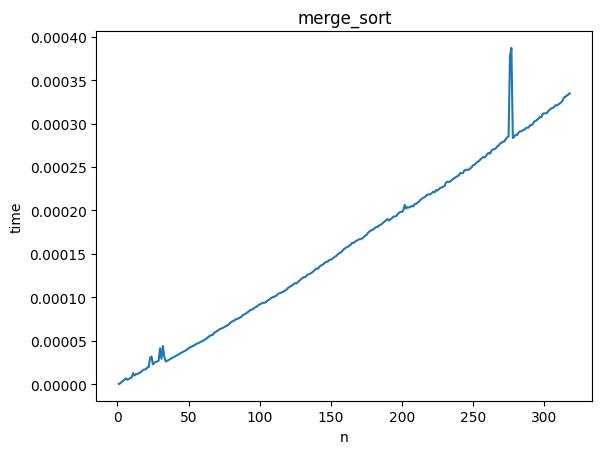

Done with merge_sort!

Running test for insertion_sort...
Saving results for insertion_sort...
Graphing results for insertion_sort...
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195

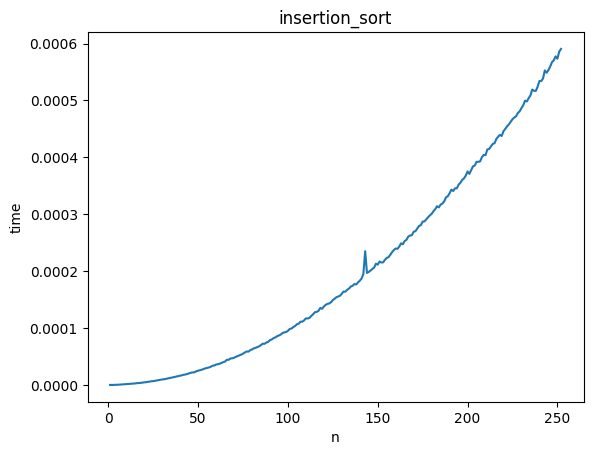

Done with insertion_sort!

Running test for tim_sort...
Saving results for tim_sort...
Graphing results for tim_sort...
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 19

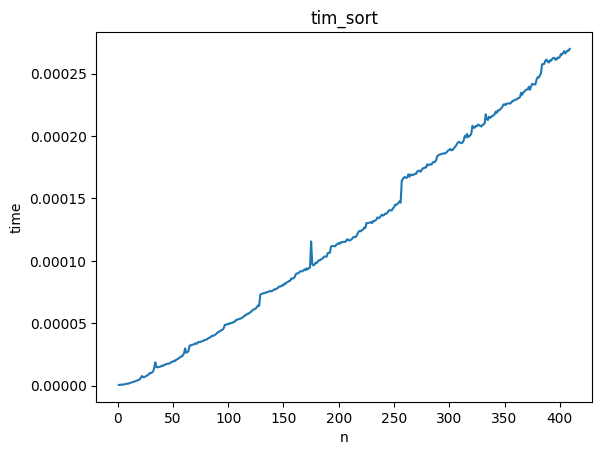

Done with tim_sort!



In [19]:
for name, algorithm in algorithms.items():
    res = []
    print(f"Running test for {name}...")
    res = run_test(algorithm, time=5)
    print(f"Saving results for {name}...")
    save_results(res, f"{name}_results.csv")
    print(f"Graphing results for {name}...")
    graph_results(res, f"{name}")
    print(f"Done with {name}!\n")

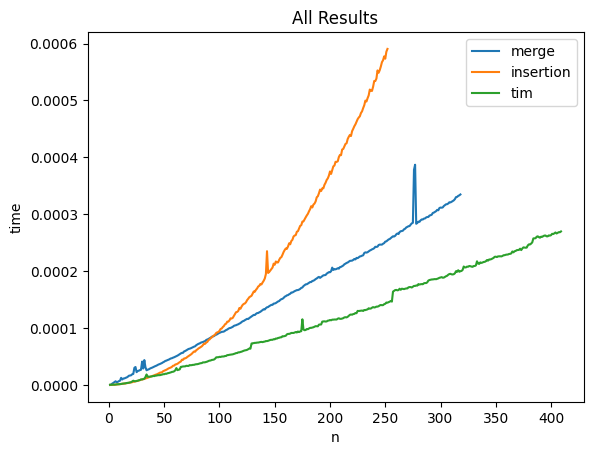

In [20]:
graph_results_merged([ f"{name}_results.csv" for name in algorithms.keys()])